# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_iris = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q7/Iris.csv')
df_iris.head()

,Unnamed: 0,Class,Petal length,Sepal length,Sepal width,Petal width
0,0,1,51,35,14,2
1,1,1,49,30,14,2
2,2,1,47,32,13,2
3,3,1,46,31,15,2
4,4,1,50,36,14,2


# Preprocess

In [3]:
df_iris.drop('Unnamed: 0', axis=1, inplace=True)

# delete duplicate rows
df_iris.drop_duplicates(ignore_index=True, inplace=True)

In [4]:
X = df_iris.drop('Class', axis=1)
y = df_iris['Class']

In [5]:
X.shape, y.shape

((149, 4), (149,))

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 4), (30, 4), (119,), (30,))

# Part a

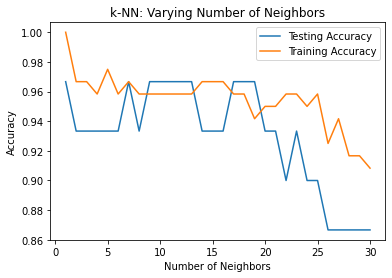

In [ ]:
neighbors = np.arange(1, 31)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  neigh = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
  neigh.fit(X_train, y_train)
  train_accuracy[i] = neigh.score(X_train, y_train)
  y_pred = neigh.predict(X_test)
  test_accuracy[i] = accuracy_score(y_pred, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

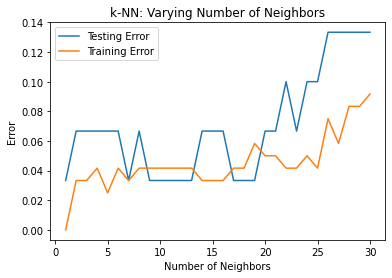

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, 1 - test_accuracy, label = 'Testing Error')
plt.plot(neighbors, 1- train_accuracy, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Confusion Matrix, Optimum K=7 

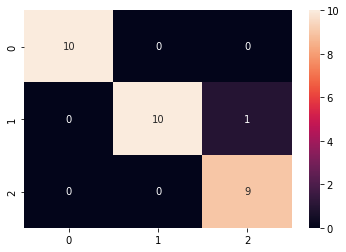

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)

# Part b

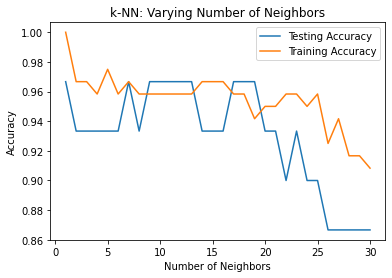

In [ ]:
neighbors = np.arange(1, 31)
train_accuracy2 = np.empty(len(neighbors))
test_accuracy2 = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  neigh = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
  neigh.fit(X_train, y_train)
  train_accuracy2[i] = neigh.score(X_train, y_train)
  y_pred = neigh.predict(X_test)
  test_accuracy2[i] = accuracy_score(y_pred, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy2, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy2, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

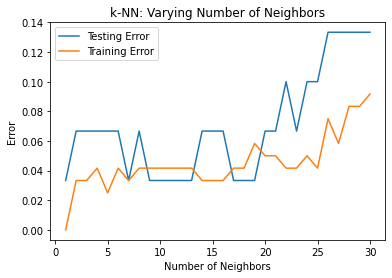

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, 1 - test_accuracy2, label = 'Testing Error')
plt.plot(neighbors, 1- train_accuracy2, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Confusion Matrix, Optimum K=7 

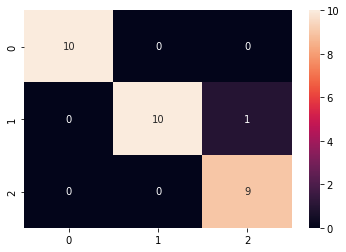

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)

# Part c

In [ ]:
df_pop_failures = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q7/pop_failures.csv')
df_pop_failures.head()

,Unnamed: 0,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


## Data Exploration and Preprocess

In [ ]:
df_pop_failures.describe()

,Unnamed: 0,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,269.500000,2.000000,90.500000,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,...,0.500111,0.499984,0.500032,0.499933,0.499944,0.499946,0.500044,0.500020,0.500021,0.914815
std,156.028843,0.817254,52.008901,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,...,0.288966,0.289127,0.289014,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,0.000000,1.000000,1.000000,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,...,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,134.750000,1.000000,45.750000,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,...,0.250758,0.251676,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,1.000000
50%,269.500000,2.000000,90.500000,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,...,0.500393,0.500322,0.500151,0.500625,0.499080,0.499959,0.500384,0.498955,0.499431,1.000000
75%,404.250000,3.000000,135.250000,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,...,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748539,0.749792,1.000000
max,539.000000,3.000000,180.000000,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,...,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000


In [ ]:
df_pop_failures.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
X = df_pop_failures.drop('outcome', axis=1)
y = df_pop_failures['outcome']
X.shape, y.shape

((540, 20), (540,))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((432, 20), (108, 20), (432,), (108,))

## KDTree

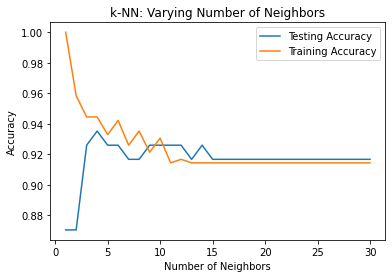

In [ ]:
neighbors = np.arange(1, 31)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  neigh = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
  neigh.fit(X_train, y_train)
  train_accuracy[i] = neigh.score(X_train, y_train)
  y_pred = neigh.predict(X_test)
  test_accuracy[i] = accuracy_score(y_pred, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

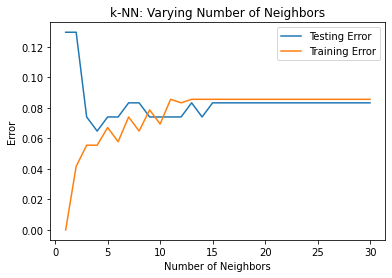

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, 1 - test_accuracy, label = 'Testing Error')
plt.plot(neighbors, 1- train_accuracy, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Confusion Matrix, Optimum K=4

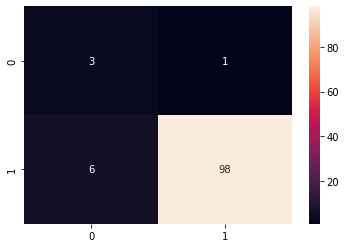

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)

## BallTree

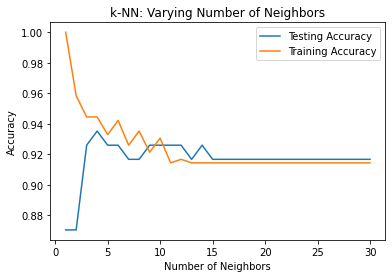

In [ ]:
neighbors = np.arange(1, 31)
train_accuracy2 = np.empty(len(neighbors))
test_accuracy2 = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  neigh = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
  neigh.fit(X_train, y_train)
  train_accuracy2[i] = neigh.score(X_train, y_train)
  y_pred = neigh.predict(X_test)
  test_accuracy2[i] = accuracy_score(y_pred, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy2, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy2, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

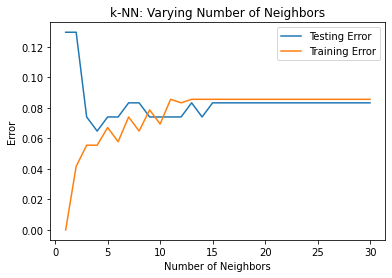

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, 1 - test_accuracy2, label = 'Testing Error')
plt.plot(neighbors, 1- train_accuracy2, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Confusion Matrix, Optimum K=4

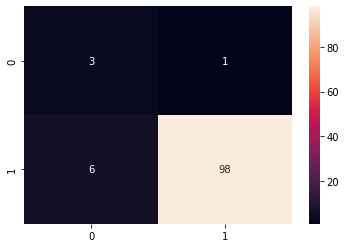

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)

In [ ]:
df_pop_failures['outcome'].value_counts()

1    494
0     46
Name: outcome, dtype: int64

#Part d

In [ ]:
df_banknote = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q7/banknote_authntication.csv')
df_banknote.head()

,Unnamed: 0,f1,f2,f3,f4,label
0,0,3.62160,8.6661,-2.8073,-0.44699,0
1,1,4.54590,8.1674,-2.4586,-1.46210,0
2,2,3.86600,-2.6383,1.9242,0.10645,0
3,3,3.45660,9.5228,-4.0112,-3.59440,0
4,4,0.32924,-4.4552,4.5718,-0.98880,0


## Data Exploration and Preprocess

In [ ]:
df_banknote.describe()

,Unnamed: 0,f1,f2,f3,f4,label
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,685.500000,0.433735,1.922353,1.397627,-1.191657,0.444606
std,396.206596,2.842763,5.869047,4.310030,2.101013,0.497103
min,0.000000,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,342.750000,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,685.500000,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,1028.250000,2.821475,6.814625,3.179250,0.394810,1.000000
max,1371.000000,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
df_banknote.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
X = df_banknote.drop('label', axis=1)
y = df_banknote['label']
X.shape, y.shape

((1372, 4), (1372,))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=41, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097,), (275,))

## KDTree

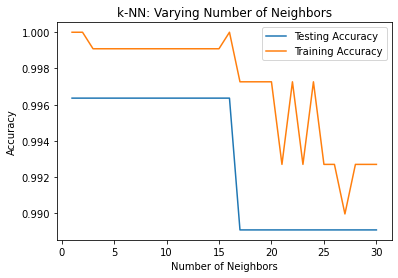

In [ ]:
neighbors = np.arange(1, 31)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  neigh = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
  neigh.fit(X_train, y_train)
  train_accuracy[i] = neigh.score(X_train, y_train)
  y_pred = neigh.predict(X_test)
  test_accuracy[i] = accuracy_score(y_pred, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

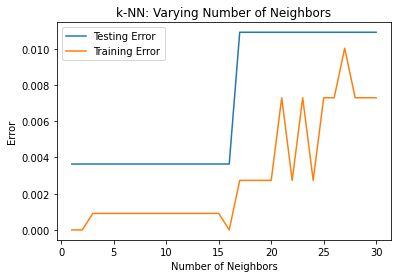

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, 1 - test_accuracy, label = 'Testing Error')
plt.plot(neighbors, 1- train_accuracy, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Confusion Matrix, Optimum K=16

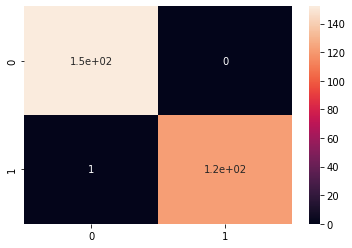

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)

In [ ]:
y_test.value_counts()

0    153
1    122
Name: label, dtype: int64

## BallTree

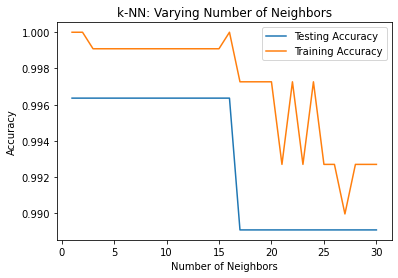

In [ ]:
neighbors = np.arange(1, 31)
train_accuracy2 = np.empty(len(neighbors))
test_accuracy2 = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  neigh = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
  neigh.fit(X_train, y_train)
  train_accuracy2[i] = neigh.score(X_train, y_train)
  y_pred = neigh.predict(X_test)
  test_accuracy2[i] = accuracy_score(y_pred, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy2, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy2, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

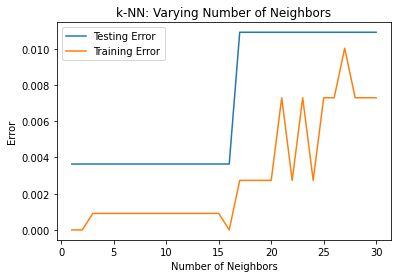

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, 1 - test_accuracy2, label = 'Testing Error')
plt.plot(neighbors, 1- train_accuracy2, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Confusion Matrix, Optimum K=16

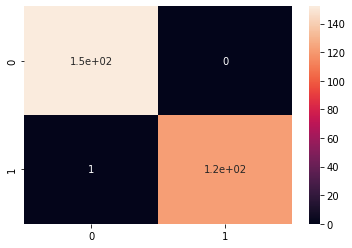

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)

# Part e

In [8]:
df_credit = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q7/credit cards.csv')
df_credit.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


## Data Exploration and Preprocess

In [ ]:
df_credit.describe()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
X = df_credit.drop('default', axis=1)
y = df_credit['default']
X.shape, y.shape

((30000, 23), (30000,))

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=41, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

## KDTree

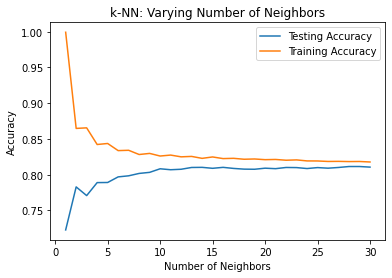

In [12]:
neighbors = np.arange(1, 31)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  neigh = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
  neigh.fit(X_train, y_train)
  train_accuracy[i] = neigh.score(X_train, y_train)
  y_pred = neigh.predict(X_test)
  test_accuracy[i] = accuracy_score(y_pred, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

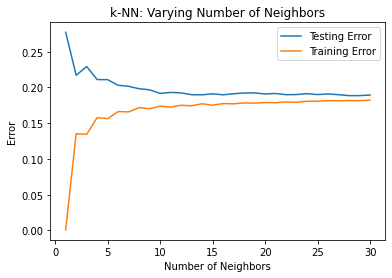

In [13]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, 1 - test_accuracy, label = 'Testing Error')
plt.plot(neighbors, 1- train_accuracy, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Confusion Matrix, Optimum K=9

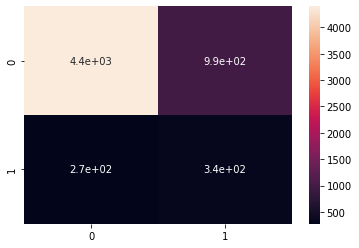

In [14]:
neigh = KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)

In [15]:
y_test.value_counts()

0.0    4673
1.0    1327
Name: default, dtype: int64

## BallTree

In [ ]:
neighbors = np.arange(1, 31)
train_accuracy2 = np.empty(len(neighbors))
test_accuracy2 = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  neigh = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
  neigh.fit(X_train, y_train)
  train_accuracy2[i] = neigh.score(X_train, y_train)
  y_pred = neigh.predict(X_test)
  test_accuracy2[i] = accuracy_score(y_pred, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy2, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy2, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, 1 - test_accuracy2, label = 'Testing Error')
plt.plot(neighbors, 1- train_accuracy2, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Confusion Matrix, Optimum K=9

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)